In [1]:
import proteosim as ps

In [2]:
print(ps.__file__)

c:\Users\boris\proteosim\proteosim\__init__.py


### 1. Import proteins from FASTA file

In [3]:
proteins = ps.read_fasta("data/sample_proteins.fasta")
len(proteins)

3

### 2. Protein digestion

In [4]:
protein_1 = list(proteins.keys())[1]

In [5]:
peptides_p1 = ps.digest_protein_sequence(proteins[protein_1], cleave_pattern=ps.enzyme_cleavage_patterns["Trypsin"])

Nr. of digested peptides: 14
Nr. of digested peptides selected: 5


In [6]:
peptides = ps.digest_protein_collection(proteins, cleave_pattern=ps.enzyme_cleavage_patterns['Trypsin'])
peptides

{'P11802': ['MATSR',
  'YEPVAEIGVGAYGTVYK',
  'DPHSGHFVALK',
  'VPNGGGGGGGLPISTVR',
  'EVALLR',
  'LEAFEHPNVVR',
  'LMDVCATSR',
  'VTLVFEHVDQDLR',
  'TYLDK',
  'APPPGLPAETIK',
  'GLDFLHANCIVHR',
  'DLKPENILVTSGGTVK',
  'LADFGLAR',
  'IYSYQMALTPVVVTLWYR',
  'APEVLLQSTYATPVDMWSVGCIFAEMFR',
  'KPLFCGNSEADQLGK',
  'IFDLIGLPPEDDWPR',
  'DVSLPR',
  'GAFPPR',
  'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK',
  'ISAFR',
  'ALQHSYLHK',
  'DEGNPE'],
 'A0A087WTH1': ['MEDEEK',
  'AVEILGNTEAAHPPSPIR',
  'CCWLR',
  'CLAATSIICGCSCLGVMALVFAIK',
  'SEEAVR'],
 'A0A087WTH5': ['MVIEWERPR',
  'MILSNTTAVTPFLTK',
  'LWQETVQQGGNMSGLAR',
  'SGDGK',
  'LEALYVLMVLGFFGFFTLGIMLSYIR',
  'LEHSNDPFNVYIESNAWQEK',
  'AYVQAR',
  'VLESYR',
  'SCYVVENHLAIEQPNTHLPETKPSP']}

In [7]:
pep_p1_coverage = ps.compute_sequence_coverage(proteins[protein_1], peptides_p1)
pep_p1_coverage

Sequence coverage: 50.86206896551724 %


50.86206896551724

### 3. Liquid Chromatography

We first need to pool our peptides into a list that we can then use in our functions.

In [8]:
peptides_list = list(peptides.values())
index = 0
pooled_peptides = []
for x in peptides_list:
    if index <= len(peptides_list) - 1:
        pooled_peptides = pooled_peptides + peptides_list[index]
        index = index + 1
    else: continue

In [9]:
retention_time_peptides = ps.predict_lc_retention_times(pooled_peptides)
retention_time_peptides

{'MATSR': np.float64(8.9),
 'YEPVAEIGVGAYGTVYK': np.float64(42.7),
 'DPHSGHFVALK': np.float64(29.0),
 'VPNGGGGGGGLPISTVR': np.float64(31.6),
 'EVALLR': np.float64(25.5),
 'LEAFEHPNVVR': np.float64(33.5),
 'LMDVCATSR': np.float64(23.6),
 'VTLVFEHVDQDLR': np.float64(41.0),
 'TYLDK': np.float64(11.1),
 'APPPGLPAETIK': np.float64(29.1),
 'GLDFLHANCIVHR': np.float64(47.5),
 'DLKPENILVTSGGTVK': np.float64(34.5),
 'LADFGLAR': np.float64(29.5),
 'IYSYQMALTPVVVTLWYR': np.float64(78.1),
 'APEVLLQSTYATPVDMWSVGCIFAEMFR': np.float64(96.2),
 'KPLFCGNSEADQLGK': np.float64(28.0),
 'IFDLIGLPPEDDWPR': np.float64(51.3),
 'DVSLPR': np.float64(14.7),
 'GAFPPR': np.float64(16.3),
 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': np.float64(80.9),
 'ISAFR': np.float64(19.9),
 'ALQHSYLHK': np.float64(28.5),
 'DEGNPE': np.float64(-4.0),
 'MEDEEK': np.float64(-0.7),
 'AVEILGNTEAAHPPSPIR': np.float64(43.8),
 'CCWLR': np.float64(24.6),
 'CLAATSIICGCSCLGVMALVFAIK': np.float64(96.2),
 'SEEAVR': np.float64(5.7),
 'MVIEWERPR': np.f

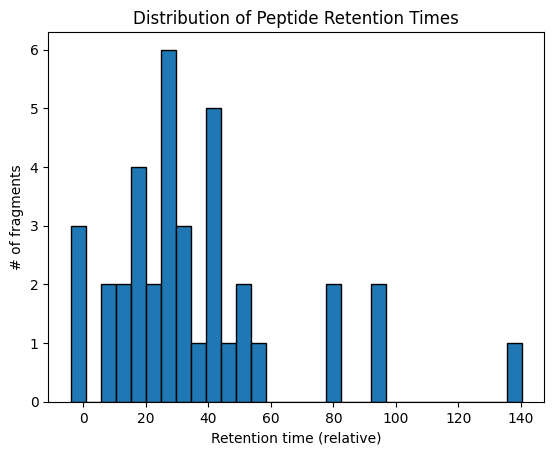

In [10]:
ps.plot_retention_time(retention_times=retention_time_peptides)

In [11]:
ps.select_retention_time_window(retention_time_peptides, lower_ret_time=0, upper_ret_time=10)

{'MATSR': np.float64(8.9), 'SEEAVR': np.float64(5.7)}